<a href="https://colab.research.google.com/github/kushalvanama/INFO5731_Spring2020/blob/main/In_class_exercise_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The seventh in-class-exercise (20 points in total, 3/16/2021)**

Question description: In the last in-class-exercise (exercise-06), you collected the titles of 100 articles about data science, natural language processing, and machine learning. The 100 article titles will be used as the text corpus of this exercise. Perform the following tasks:

## (1) (8 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [ ]:
 !pip install pyLDAvis

     |████████████████████████████████| 1.7MB 11.3MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.2.2-py2.py3-none-any.whl size=135593 sha256=8e128c08942b9aa9703260f84f622c8bc8e844848b94f764928e94ba95b4b4fd
  Stored in directory: /root/.cache/pip/wheels/74/df/b6/97234c8446a43be05c9a8687ee0db1f1b5ade5f27729187eae
Successfully built pyLDAvis


In [ ]:
# Run in python console
import nltk; nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Write your code here
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)



/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:

# Write your code here

# Write your code here

from IPython.core.display import display, HTML
display(HTML('<style>.container { width:80% !important; }</style>'))
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np


headers = [{'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:81.0) Gecko/20100101 Firefox/81.0'},
           {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Safari/537.36 Vivaldi/3.3'},
           {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Safari/537.36'},
           {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Safari/537.36 Edg/86.0.622.38'}]

pages = np.arange(1, 11) * 10 

responses = []
for page in pages:
    url = 'https://scholar.google.com/scholar?start=' + str(page) + '&q=natural+language+processing&hl=en&as_sdt=0,44'
    print(f'{page} titles being extracted')
    random_index = np.random.randint(0, 4)
    header = headers[random_index]
    response = requests.get(url, headers=header)
    if response.status_code == 200:
        print('Everything is fine. Continue to scrap ...')
    else:
        print('Something went wrong!')
    soup=BeautifulSoup(response.content,'lxml')
    responses.append(soup)


10 titles being extracted
Everything is fine. Continue to scrap ...
20 titles being extracted
Everything is fine. Continue to scrap ...
30 titles being extracted
Everything is fine. Continue to scrap ...
40 titles being extracted
Everything is fine. Continue to scrap ...
50 titles being extracted
Everything is fine. Continue to scrap ...
60 titles being extracted
Everything is fine. Continue to scrap ...
70 titles being extracted
Everything is fine. Continue to scrap ...
80 titles being extracted
Everything is fine. Continue to scrap ...
90 titles being extracted
Everything is fine. Continue to scrap ...
100 titles being extracted
Everything is fine. Continue to scrap ...


In [ ]:
titles = []
count = 1
for response in responses:
    for item in response.select('[data-lid]'):
        try:
            titles.append(item.select('h3')[0].get_text())
        except Exception as error:
            print('Something went wrong!')
        count += 1

In [ ]:
df = pd.DataFrame({'titles' : titles})
df.head()

,titles
0,Natural language processing
1,[BOOK][B] Natural language processing
2,[PDF][PDF] Natural language processing
3,[BOOK][B] Strategies for natural language proc...
4,[PDF][PDF] Human engineering fcr applied natur...


In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(titles))
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
bigram_mod = gensim.models.phrases.Phraser(bigram)

print(data_words[:1])
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
data_words_nostops = remove_stopwords(data_words)
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[['natural', 'language', 'processing']]
[['natural', 'language', 'processing']]
[[(0, 1), (1, 1), (2, 1)]]
[(0,
  '0.006*"analyze" + 0.006*"tool" + 0.006*"statistical" + 0.006*"medical" + '
  '0.006*"semantical" + 0.006*"lyric" + 0.006*"medium" + 0.006*"social" + '
  '0.006*"systematic" + 0.006*"discourse"'),
 (1,
  '0.166*"natural" + 0.166*"language" + 0.125*"processing" + 0.031*"system" + '
  '0.031*"neural" + 0.031*"base" + 0.031*"process" + 0.021*"clinical" + '
  '0.021*"network" + 0.021*"model"'),
 (2,
  '0.089*"processing" + 0.088*"language" + 0.088*"mining" + 0.088*"text" + '
  '0.005*"natural" + 0.005*"literature" + 0.005*"review" + 0.004*"medium" + '
  '0.004*"analyze" + 0.004*"lyric"'),
 (3,
  '0.089*"processing" + 0.088*"language" + 0.088*"medicine" + 0.088*"overview" '
  '+ 0.005*"review" + 0.005*"literature" + 0.005*"natural" + 0.004*"lyric" + '
  '0.004*"medium" + 0.004*"medical"'),
 (4,
  '0.134*"processing" + 0.134*"language" + 0.132*"natural" + 0.059*"learn" + '
  '0.0

## (2) (8 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [ ]:
# Write your code here
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [ ]:
def preprocess_data(doc_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
      model = LsiModel(doc_term_matrix, num_topics, id2word = dictionary)  # train model
      model_list.append(model)
      coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
      coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

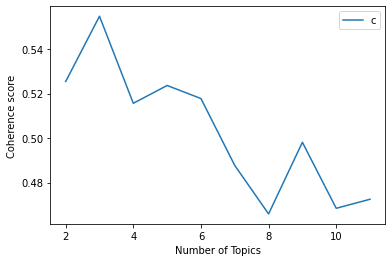

In [ ]:
start,stop,step=2,12,1
clean_text=preprocess_data(titles)
plot_graph(clean_text,start,stop,step)


In [ ]:
number_of_topics=3
words=10
clean_text=preprocess_data(titles)
model=create_gensim_lsa_model(clean_text,number_of_topics,words)

[(0, '0.562*"languag" + 0.549*"natur" + 0.539*"process" + 0.230*"pdf" + 0.077*"b" + 0.077*"book" + 0.069*"learn" + 0.046*"use" + 0.037*"deep" + 0.035*"review"'), (1, '0.931*"pdf" + -0.154*"book" + -0.154*"b" + -0.125*"languag" + -0.110*"natur" + -0.097*"process" + 0.049*"medicin" + 0.042*"retriev" + -0.041*"html" + -0.038*"base"'), (2, '0.648*"book" + 0.648*"b" + 0.169*"pdf" + -0.106*"html" + -0.095*"use" + -0.092*"languag" + -0.084*"base" + -0.078*"clinic" + -0.069*"natur" + -0.050*"network"')]


## (3) (4 points) Compare the results generated by the two topic modeling algorithms, which one is better? You should explain the reasons in details.

In [ ]:
# Write your answer here (no code needed for this question)

LDA has 19 topic models while LSA has 3 topic models, though bag of words in both the models are same there are less dimensions in LSA while compared to LDA. 
As LSA has only 3 topic models it is faster than LDA. Though the output of both the models are similar both have the preprocessing steps to lemmatize the sentences and LDA is implemented with LDA following diricilet method and LSA is probabilistic manner.


